<a id="0"></a> <br>

> ## Introduction
- Currently, being able to predict that something might be popular beforehand is an important research subject for every industry. It also has recently became a very important subject for the growing and competitive music industry as well. Since wide use of digital music platforms (Spotify, Billboard, Lastfm), data can be easily reached and the listening behaviors of the listeners can be easily observed. This provides convenience in forecasting techniques and it is also frequently used in recommendation systems.

# <a id="1"></a> <br>
> ## Feature Explanations
- Dataset contains 19.000 songs and has 15 features like duration ms, key, audio mode, acousticness, danceability, energy and so on .
- duration_ms: The duration of the track in milliseconds.
- key: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- audio_mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- time_signature: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. 
- instrumentalness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.Values below 0.33 most likely represent music and other non-speech-like tracks.
- audio_valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 
- song_popularity: Song ratings of spotify audience.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.

<a id="2"></a> 
## Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# Any results you write to the current directory are saved as output.
import warnings
warnings.filterwarnings("ignore")

 <a id="3"></a> 
 ## Data Preparation and Analysis

In [2]:
#load the data
spotify_song_data= pd.read_csv("Datasets/Spotify/song_data.csv")
spotify_song_info= pd.read_csv("Datasets/Spotify/song_info.csv") 

In [3]:
song_info=spotify_song_info.copy()

In [4]:
song_data=spotify_song_data.copy()
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [5]:
song_data.shape

(18835, 15)

 <a id="3a"></a> 
## Cleaning Data

In [6]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [7]:
song_data.isnull().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

 <a id="3b"></a> 
## Analysis

In [8]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5), object(1)
memory usage: 2.2+ MB


In [9]:
song_data.song_duration_ms= song_data.song_duration_ms.astype(float)
song_data.time_signature= song_data.time_signature.astype(float)
song_data.audio_mode= song_data.audio_mode.astype(float)

In [10]:
song_data.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


In [11]:
song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in song_data.song_popularity ]
song_data["popularity"].value_counts()

popularity
0    13386
1     5449
Name: count, dtype: int64

- Checked popularity rating of songs that have been popular in the last 10 years in Spotify and took the mean value of them (66.5) . According to this value, the songs has above this rating could remain on the top lists for a long time. If song_popularity is higher than 66.5 (this is about 30% percent of data) we labeled it "1" and if is not we labeled it "0". So we have "1" for the popular songs and "0" for the unpopular ones.

In [12]:
#popular songs' data
a=song_data[song_data["popularity"]==1]
a.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
count,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.00000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.000000,5449.0
mean,76.992292,218539.555515,0.210354,0.659758,0.658601,0.022390,5.11782,0.174400,-6.624852,0.618829,0.106247,120.753878,3.974307,0.520436,1.0
std,8.068717,48620.048311,0.246079,0.147652,0.187495,0.115572,3.65752,0.137557,3.139341,0.485719,0.102181,27.737971,0.255771,0.230911,0.0
min,67.000000,67000.000000,0.000009,0.072200,0.002890,0.000000,0.00000,0.021500,-34.255000,0.000000,0.022400,57.178000,1.000000,0.035200,1.0
25%,71.000000,190185.000000,0.026300,0.562000,0.541000,0.000000,1.00000,0.092000,-7.906000,0.000000,0.039100,98.883000,4.000000,0.336000,1.0
50%,75.000000,212429.000000,0.106000,0.668000,0.680000,0.000000,5.00000,0.121000,-5.985000,1.000000,0.059100,119.886000,4.000000,0.511000,1.0
75%,82.000000,240533.000000,0.300000,0.765000,0.802000,0.000118,8.00000,0.203000,-4.626000,1.000000,0.131000,139.910000,4.000000,0.701000,1.0
max,100.000000,547733.000000,0.996000,0.978000,0.997000,0.968000,11.00000,0.978000,-0.739000,1.000000,0.733000,212.058000,5.000000,0.980000,1.0


In [13]:
song_data.corr(numeric_only=True)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.013160,-0.038937,0.099442,-0.004969,0.021479,-0.022672,0.034983,-0.052895,0.699048
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421,0.003494
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670,-0.106483
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014,0.107519
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742,0.040548
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570,-0.160144
key,-0.013160,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356,-0.030251
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789,-0.023265
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696,0.137111
audio_mode,-0.004969,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558,-0.012290


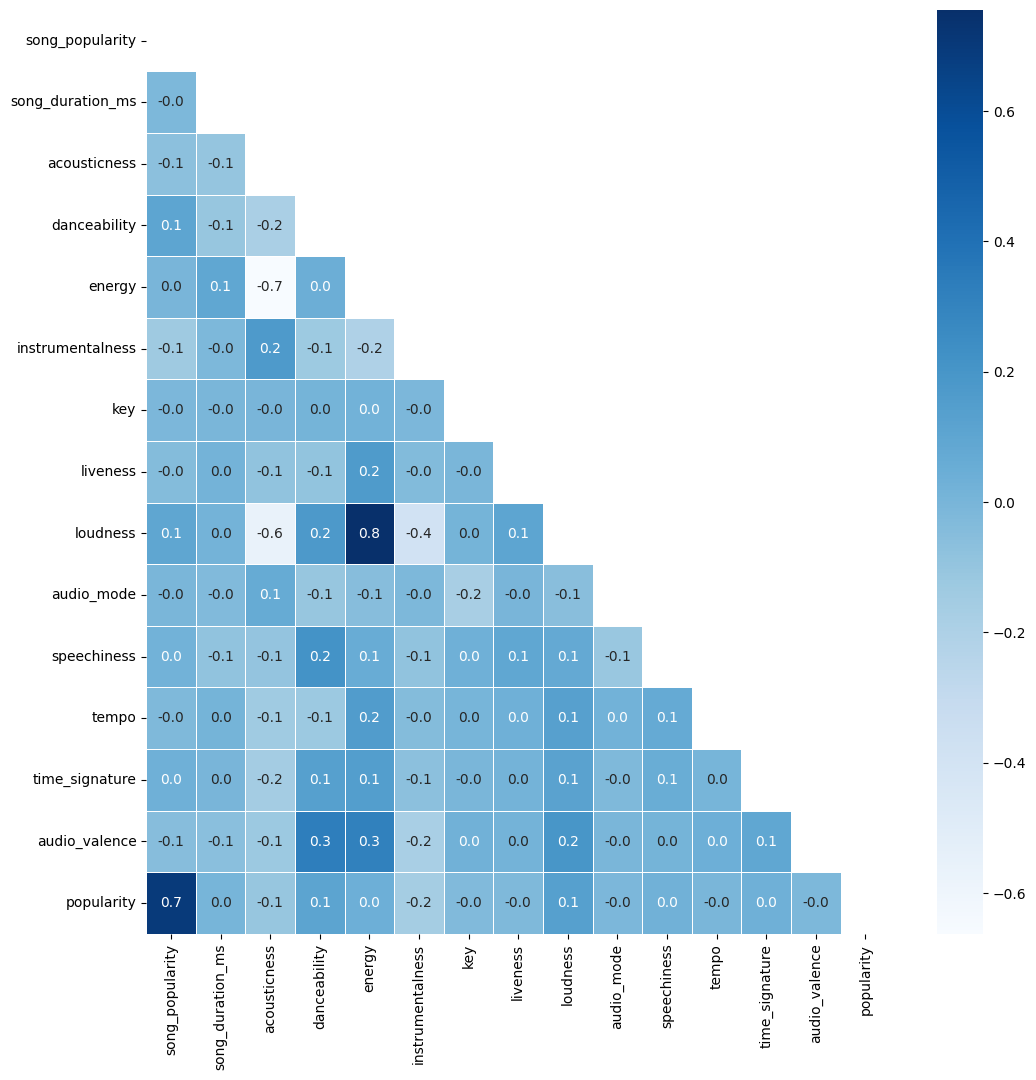

In [14]:
f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr(numeric_only=True))
mask[np.triu_indices_from(mask)] = True
sns.heatmap(song_data.corr(numeric_only=True), annot=True, linewidths=0.4,linecolor="white", fmt= '.1f',ax=ax,cmap="Blues",mask=mask)
plt.show() 

- Correlation between loudness and energy is 0.8 which is strong and correlation between loudness and accusticness is 0.6 which is moderate. Except two of them all the correlations are quite low. When we compare the correlation between song_popularity and all other features, we don't see a strong correlation (a linear relationship) that gives us a clear information about popularity. Accusticness,danceability and loudness seems to have correlation with popularity feature(0.10) and istrumentalness has 0.20.

## Categorical Variable Analysis

In [15]:
def bar_plot(variable):
    
    var=song_data[variable]
    var_value= var.value_counts()
    
    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(var_value.index,var_value,color="orange")
    plt.xticks(var_value.index,var_value.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,var_value))


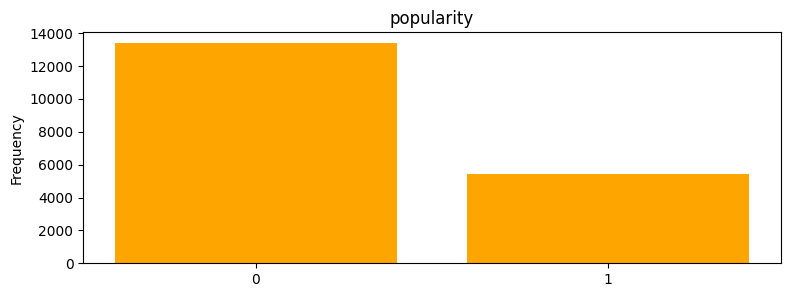

popularity:
popularity
0    13386
1     5449
Name: count, dtype: int64


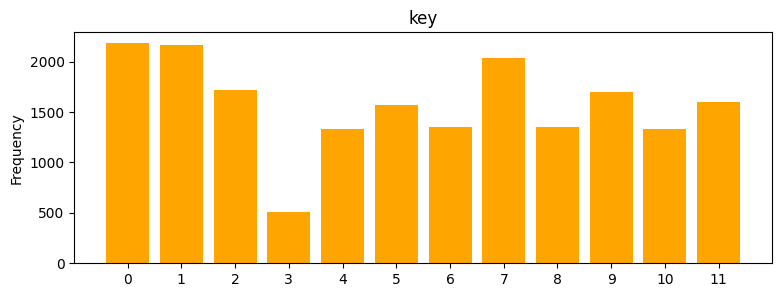

key:
key
0     2182
1     2164
7     2032
2     1715
9     1698
11    1600
5     1574
6     1351
8     1349
10    1331
4     1327
3      512
Name: count, dtype: int64


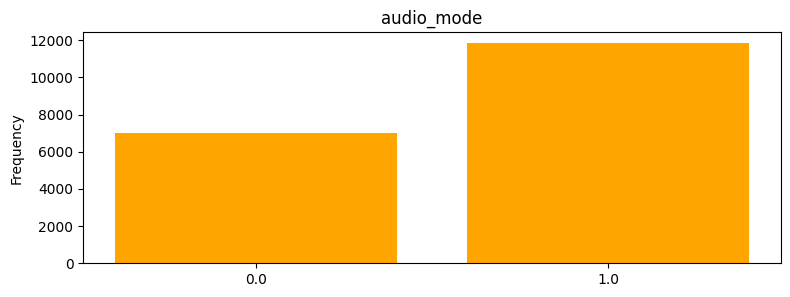

audio_mode:
audio_mode
1.0    11831
0.0     7004
Name: count, dtype: int64


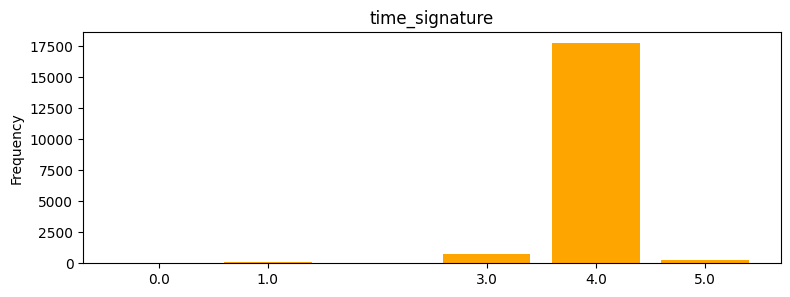

time_signature:
time_signature
4.0    17754
3.0      772
5.0      233
1.0       73
0.0        3
Name: count, dtype: int64


In [16]:
category1 = ["popularity","key","audio_mode","time_signature"]
for c in category1:
    bar_plot(c)

## Basic Data Analysis

In [17]:
# key vs popularity
song_data[["key","popularity"]].groupby(["key"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,key,popularity
1,1,0.356285
6,6,0.321984
0,0,0.303850
5,5,0.300508
11,11,0.293750
8,8,0.292068
4,4,0.284853
10,10,0.280992
2,2,0.265889
9,9,0.253828


In [18]:
# audio_mode vs popularity
song_data[["audio_mode","popularity"]].groupby(["audio_mode"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,audio_mode,popularity
0,0.0,0.296545
1,1.0,0.285014


In [19]:
# time_signature vs popularity
song_data[["time_signature","popularity"]].groupby(["time_signature"], as_index = False).mean().sort_values(by="popularity",ascending = False)

,time_signature,popularity
4,5.0,0.304721
3,4.0,0.292497
2,3.0,0.222798
1,1.0,0.178082
0,0.0,0.000000


In [20]:
from collections import Counter
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index #filtre
        # store indeces
        outlier_indices.extend(outlier_list_col) #The extend() extends the list by adding all items of a list (passed as an argument) to the end.
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2) 
    
    return multiple_outliers

In [21]:
song_data.loc[detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"])]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity
232,La Maza,58,351400.0,0.6520,0.555,0.331,0.000012,9,0.235,-17.718,0.0,0.2700,170.603,3.0,0.437,0
253,Whole Lotta Love,77,333893.0,0.0484,0.412,0.902,0.131000,9,0.405,-11.600,1.0,0.4050,89.740,4.0,0.422,1
501,Do You Feel Like We Do,48,836666.0,0.0439,0.295,0.568,0.011700,0,0.977,-8.232,1.0,0.0284,98.284,4.0,0.384,0
981,The Times They Are A-Changin' - Live at Sony M...,49,348560.0,0.6300,0.393,0.416,0.007910,9,0.986,-13.243,1.0,0.0401,163.604,3.0,0.512,0
1113,November Rain,38,537506.0,0.0165,0.197,0.629,0.279000,11,0.125,-9.291,1.0,0.0300,79.495,4.0,0.221,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15247,I Know You So Well,8,102661.0,0.9230,0.679,0.311,0.721000,0,0.813,-16.557,0.0,0.1050,60.724,4.0,0.304,0
16642,same stars,46,116918.0,0.2510,0.687,0.284,0.862000,0,0.496,-19.504,1.0,0.0378,115.996,4.0,0.159,0
17723,Dutch Spring,0,205623.0,0.1960,0.510,0.843,0.135000,6,0.569,-4.958,0.0,0.3910,83.355,4.0,0.832,0
3720,Racism And Injustice,21,260160.0,0.9220,0.650,0.316,0.000000,9,0.739,-18.244,0.0,0.9400,117.198,4.0,0.306,0


In [22]:
# drop outliers
song_data = song_data.drop(detect_outliers(song_data,["song_popularity","song_duration_ms","danceability","energy","instrumentalness","liveness","loudness","speechiness","audio_valence"]),axis = 0).reset_index(drop = True)

In [23]:
song_data[song_data["audio_mode"].isnull()]

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity


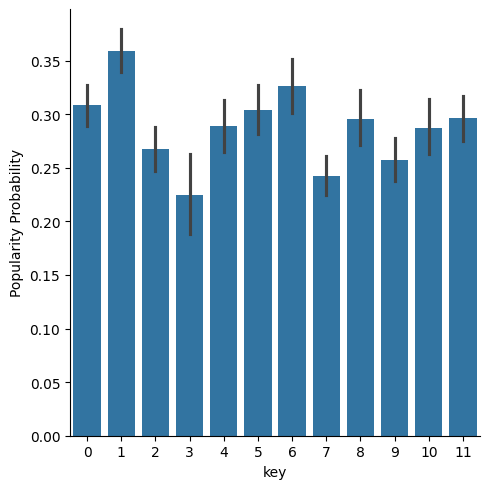

In [27]:
g = sns.catplot(x = "key", y = "popularity", data = song_data, kind = "bar")

g.set_ylabels("Popularity Probability")
plt.show()

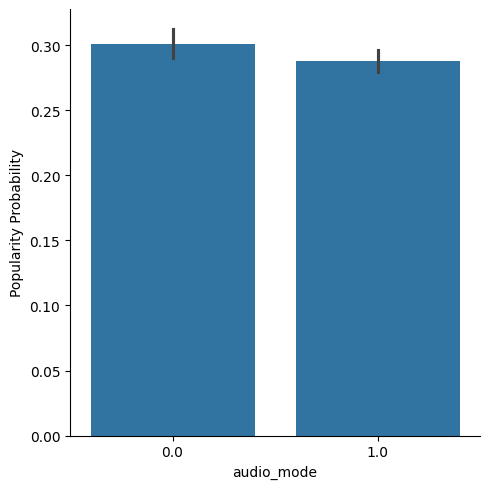

In [28]:
g = sns.catplot(x = "audio_mode", y = "popularity", data = song_data, kind = "bar")
g.set_ylabels("Popularity Probability")
plt.show()

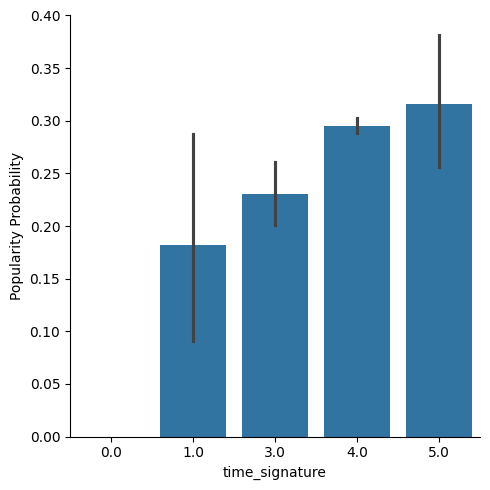

In [29]:
g = sns.catplot(x = "time_signature", y = "popularity", data = song_data, kind = "bar")
g.set_ylabels("Popularity Probability")
plt.show()

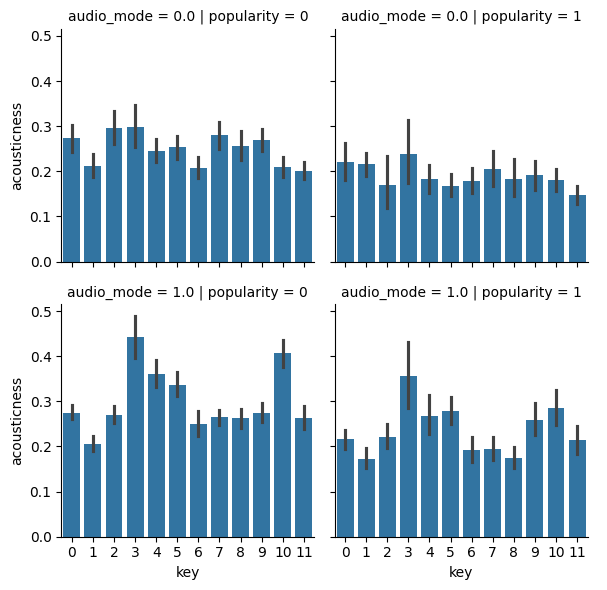

In [31]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity")
g.map(sns.barplot, "key", "acousticness")
g.add_legend()
plt.show()

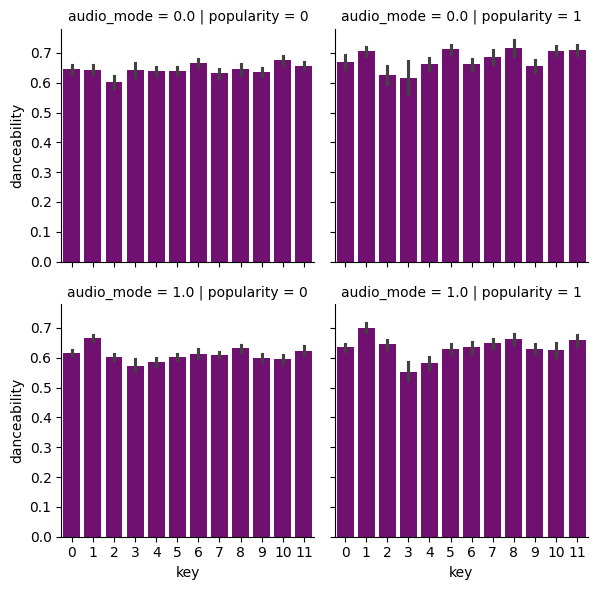

In [32]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity")
g.map(sns.barplot, "key", "danceability",color="purple")
g.add_legend()
plt.show()

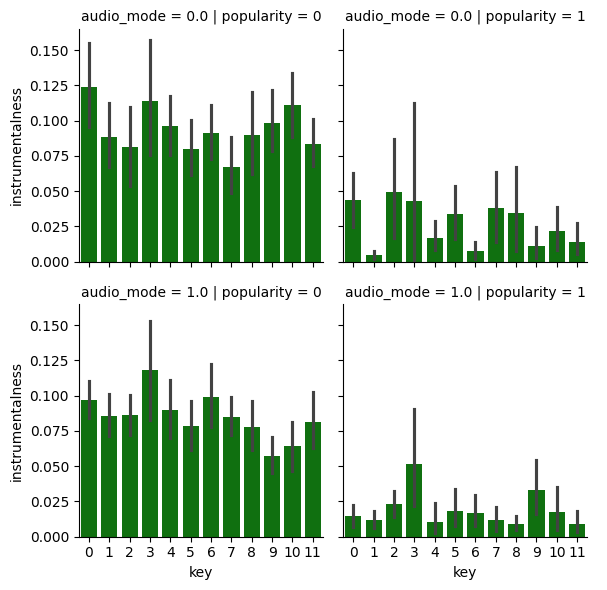

In [33]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity")
g.map(sns.barplot, "key", "instrumentalness",color="green")
g.add_legend()
plt.show()

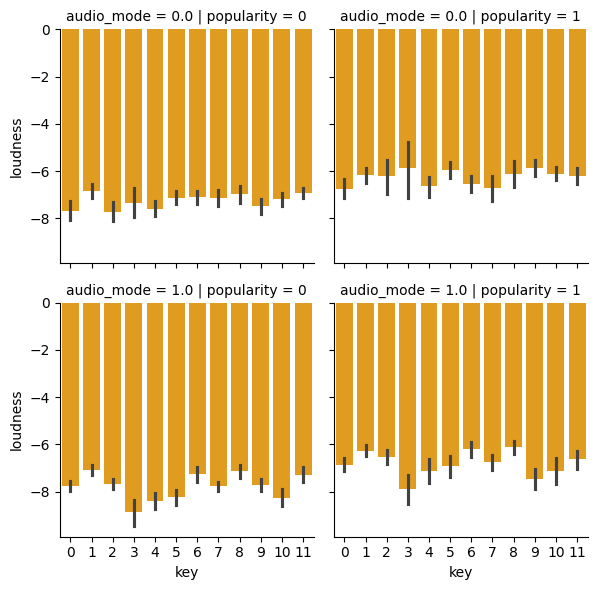

In [34]:
g = sns.FacetGrid(song_data, row = "audio_mode", col = "popularity")
g.map(sns.barplot, "key", "loudness",color="orange")
g.add_legend()
plt.show()

> ## Features Distribution


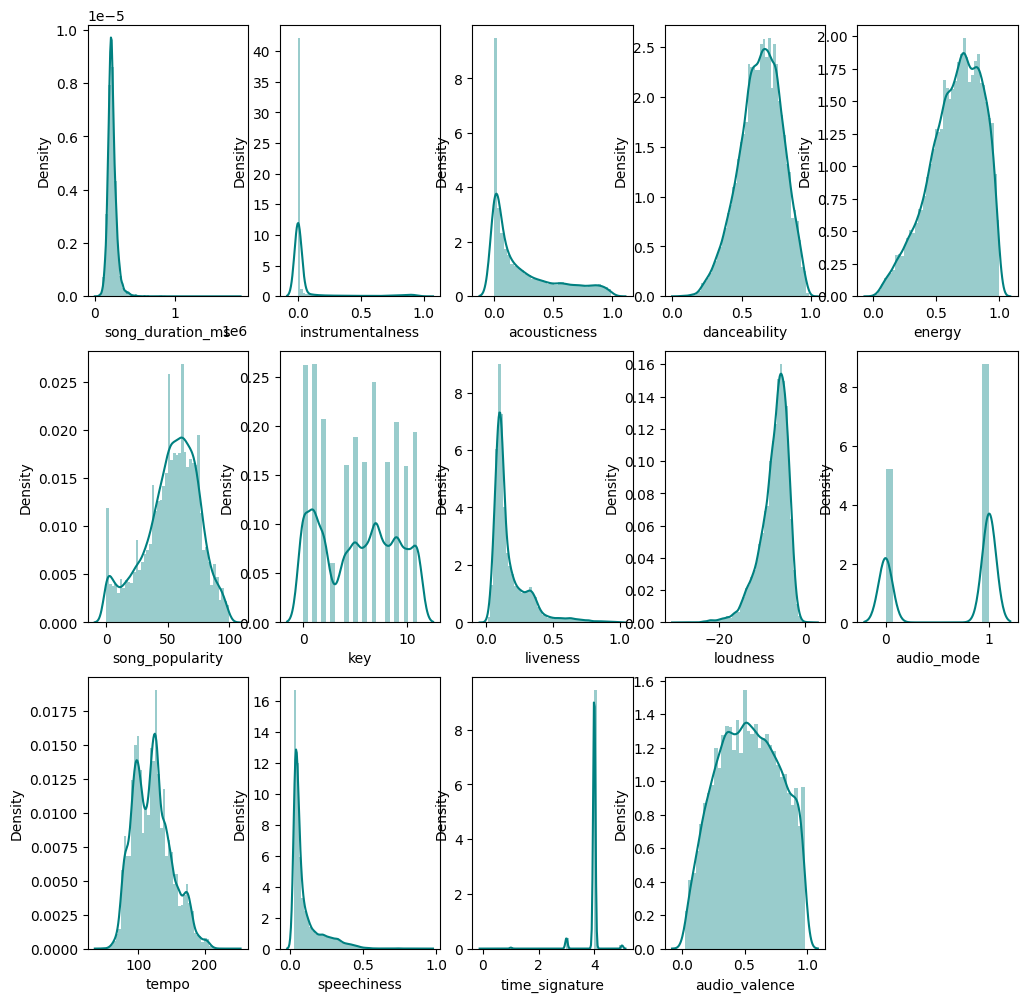

In [35]:
f, axes = plt.subplots(3, 5, figsize=(12, 12))
sns.distplot( song_data["song_duration_ms"] , color="teal", ax=axes[0, 0])
sns.distplot( song_data["instrumentalness"] , color="teal", ax=axes[0, 1])
sns.distplot( song_data["acousticness"] , color="teal", ax=axes[0, 2])
sns.distplot( song_data["danceability"] , color="teal", ax=axes[0, 3])
sns.distplot( song_data["energy"] , color="teal", ax=axes[0, 4])
sns.distplot( song_data["song_popularity"] , color="teal", ax=axes[1, 0])
sns.distplot( song_data["key"] , color="teal", ax=axes[1, 1])
sns.distplot( song_data["liveness"] , color="teal", ax=axes[1, 2])
sns.distplot( song_data["loudness"] , color="teal", ax=axes[1, 3])
sns.distplot( song_data["audio_mode"] , color="teal", ax=axes[1, 4])
sns.distplot( song_data["tempo"] , color="teal", ax=axes[2, 0])
sns.distplot( song_data["speechiness"] , color="teal", ax=axes[2, 1])
sns.distplot( song_data["time_signature"] , color="teal", ax=axes[2, 2])
sns.distplot( song_data["audio_valence"] , color="teal", ax=axes[2, 3])
f.delaxes(axes[2][4])
plt.show()

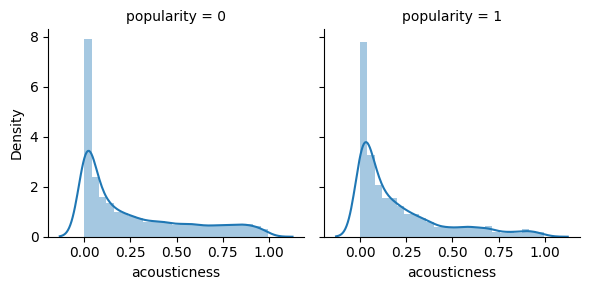

In [36]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "acousticness", bins = 25)
plt.show()

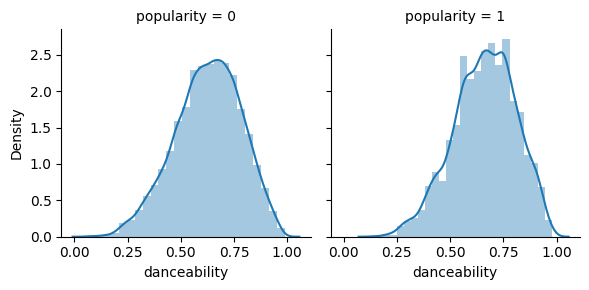

In [37]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "danceability", bins = 25)
plt.show()

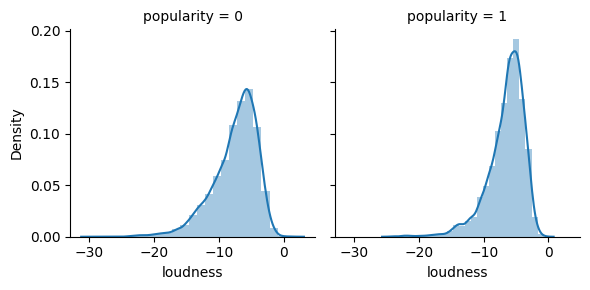

In [38]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "loudness", bins = 25)
plt.show()

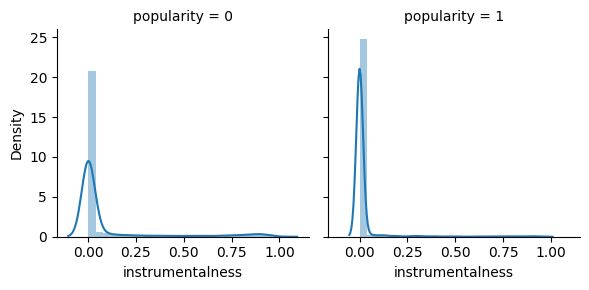

In [39]:
g = sns.FacetGrid(song_data, col = "popularity")
g.map(sns.distplot, "instrumentalness", bins = 25)
plt.show()

- Data distribution of songs display today's songs features like dancebility, energy, loudness and tempo are quite high. People like fast and loud music.
- According to instrumentalness, liveness and speechness, most of the songs are not live performances and they have lyrics.
- Keys like 0,1,5,6 and 11 seems more effective in songs. And if key== 0 or 1 or 6 song has more chance to be populer.
- Time_signure is mostly 4 and 5 in both populer and general data.
- If danceability>0.6 song has more chance to be popular.
- If loudness > -10 song has more chance to be popular.


> ## People like Happy Songs or Sad Songs?
- As we see in the feature explanations, audio valance describes the musical positiveness conveyed by a track (like sad or happiness - between 0 to 1). We supposed our threshold is 0.5.
- With this threshold we have happy songs more in the general data and the numbers are pretty close in the popular songs, but when we looked at top 500, we can say that negative songs are twice as much as positives.

**All Songs**

In [40]:
song_data3=song_data.copy()
song_data3["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data.audio_valence ]
song_data3["song_audio_valence"].value_counts()

song_audio_valence
Happy    10047
Sad       8463
Name: count, dtype: int64

**Populer Songs**

In [41]:
song_data1=song_data3[song_data3["song_popularity"]>66.5]
song_data1["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data1.audio_valence ]
song_data1["song_audio_valence"].value_counts()

song_audio_valence
Happy    2845
Sad      2574
Name: count, dtype: int64

**Top 500**

In [42]:
song_data2_new=song_data1[song_data1["song_popularity"]>90]
song_data2_new["song_audio_valence"]= [ "Happy" if i>=0.5 else "Sad" for i in song_data2_new.audio_valence ]
song_data2_new["song_audio_valence"].value_counts()

song_audio_valence
Sad      332
Happy    167
Name: count, dtype: int64

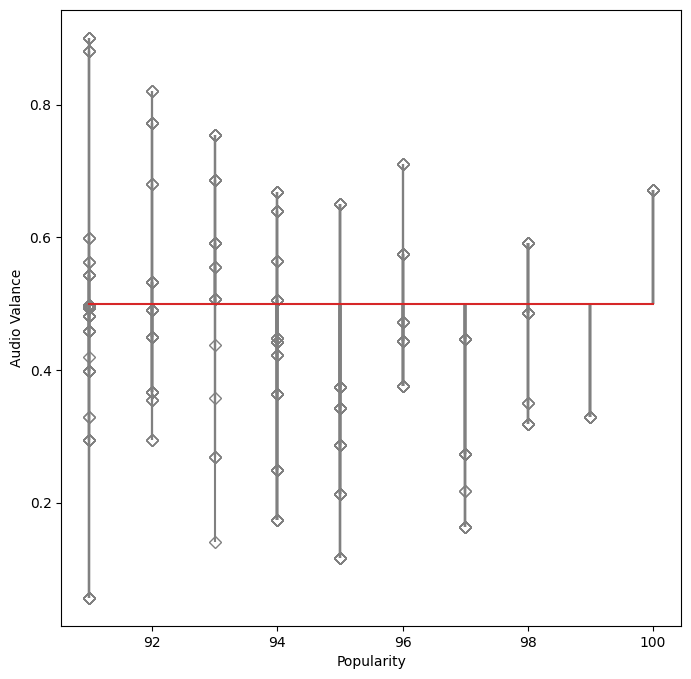

In [43]:
song_data2= song_data2_new[song_data2_new.popularity==1]
a=song_data2.iloc[:,1]
a.to_numpy()
b=song_data2.iloc[:,14]
b.to_numpy()
plt.figure(figsize=[8,8])
markerline, stemlines, baseline = plt.stem(
    a, b, linefmt='grey', markerfmt='D', bottom=0.5)
markerline.set_markerfacecolor('none')
plt.xlabel("Popularity")
plt.ylabel("Audio Valance")
plt.show()

In [44]:
new_data = pd.concat([song_info, song_data1],axis=1)
new_data=new_data[new_data["song_popularity"]>90]

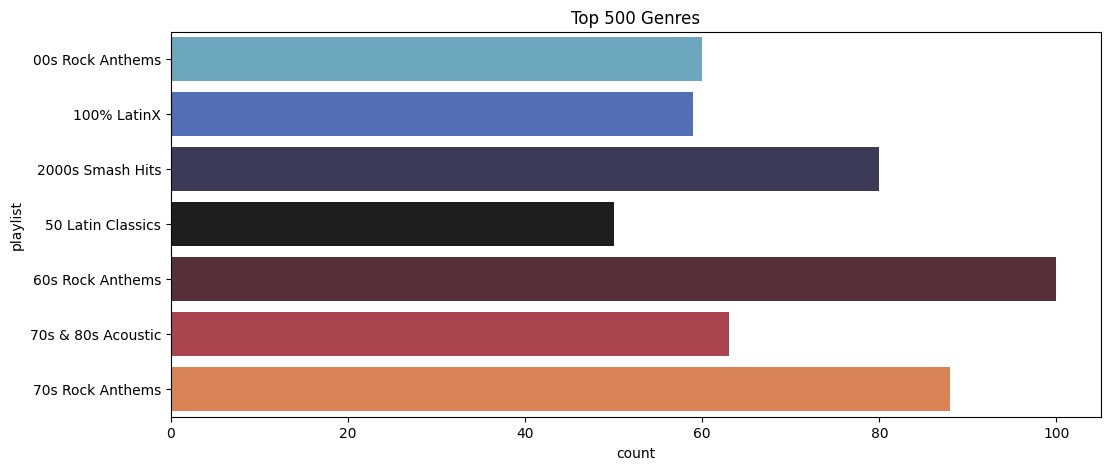

In [45]:
# Top 500 Playlists Gender
plt.figure(figsize=(12,5))
new_data= song_info['playlist'].head(500)
g = sns.countplot(new_data, palette="icefire")
plt.title("Top 500 Genres")
plt.show()

- 60's and 70's rock music seems more popular in this data.

 <a id="3c"></a> 
## Feature Engineering

In [46]:
spotify_song_data["popularity"]= [ 1 if i>=66.5 else 0 for i in spotify_song_data.song_popularity ]
spotify_song_data["popularity"].value_counts()

popularity
0    13386
1     5449
Name: count, dtype: int64

In [47]:
data_plr = pd.concat([spotify_song_data.popularity,spotify_song_data.song_name],axis=1)
data_plr.head()

,popularity,song_name
0,1,Boulevard of Broken Dreams
1,0,In The End
2,1,Seven Nation Army
3,1,By The Way
4,0,How You Remind Me


In [48]:
song_data['song_name'].value_counts(dropna=False)
song_data['song_name'].dropna(inplace=True)

In [49]:
import re
import nltk 
import nltk as nlp

nltk.download("stopwords") 
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [50]:
Song_Name = [ word for word in spotify_song_data.song_name if not word in set(stopwords.words("english"))]
lemma = nlp.WordNetLemmatizer()
Song_Name = [ lemma.lemmatize(word) for word in Song_Name] 

In [51]:
Song_Name_list = []
for Song_Name in data_plr.song_name:
    Song_Name = re.sub("[^a-zA-Z]"," ",Song_Name)
    Song_Name = Song_Name.lower() 
    Song_Name = nltk.word_tokenize(Song_Name)
    lemma = nlp.WordNetLemmatizer()
    Song_Name = [ lemma.lemmatize(word) for word in Song_Name]
    Song_Name = " ".join(Song_Name)
    Song_Name_list.append(Song_Name)

In [53]:
# %% bag of words
from sklearn.feature_extraction.text import CountVectorizer
max_features = 10
count_vectorizer = CountVectorizer(max_features=max_features,stop_words = "english")
sparce_matrix = count_vectorizer.fit_transform(Song_Name_list).toarray()  
print("en sik kullanilan {} kelimeler: {}".format(max_features,count_vectorizer.get_feature_names_out()))

en sik kullanilan 10 kelimeler: ['don' 'edit' 'feat' 'la' 'like' 'love' 'radio' 'remastered' 'remix'
 'version']


In [55]:
a = count_vectorizer.get_feature_names_out()

In [56]:
df=pd.DataFrame(Song_Name_list,columns=['Names'])

In [57]:
artist= song_info.artist_name.tolist()
name_count = Counter(artist)         
most_common_names2 = name_count.most_common(10) 
most_common_names2


[('Kanye West', 82),
 ('Lady Gaga', 78),
 ('Drake', 68),
 ('Khalid', 61),
 ('Eminem', 47),
 ('6ix9ine', 45),
 ('David Guetta', 45),
 ('Calvin Harris', 40),
 ('The Chainsmokers', 40),
 ('Lil Wayne', 39)]

**SENTIMENTAL ANALYSIS**

In [58]:
from textblob import TextBlob
data_plr['sentiment'] = data_plr['song_name'].map(lambda text: TextBlob(text).sentiment.polarity)

In [59]:
data_plr.head()

,popularity,song_name,sentiment
0,1,Boulevard of Broken Dreams,-0.4
1,0,In The End,0.0
2,1,Seven Nation Army,0.0
3,1,By The Way,0.0
4,0,How You Remind Me,0.0


In [60]:
import numpy as np
cut = pd.cut(
    data_plr['sentiment'],
    [-np.inf, -.01, .01, np.inf],
    labels=['negative', 'neutral', 'positive']
)
data_plr['polarity'] = cut.values
data_plr[['polarity','sentiment']].head()

,polarity,sentiment
0,negative,-0.4
1,neutral,0.0
2,neutral,0.0
3,neutral,0.0
4,neutral,0.0


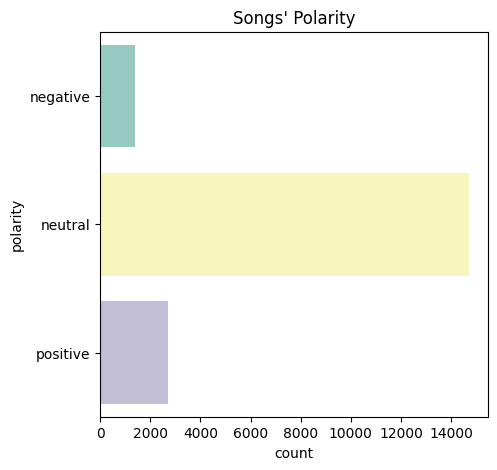

In [61]:
plt.figure(figsize=(5,5))
data= data_plr.polarity
g = sns.countplot(data, palette="Set3")
plt.title("Songs' Polarity")
plt.show()

In [62]:
song_data =pd.concat([song_data,data_plr.sentiment],axis=1)
song_data.head(3)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,popularity,sentiment
0,Boulevard of Broken Dreams,73.0,262333.0,0.00552,0.496,0.682,0.000029,8.0,0.0589,-4.095,1.0,0.0294,167.060,4.0,0.474,1.0,-0.4
1,In The End,66.0,216933.0,0.01030,0.542,0.853,0.000000,3.0,0.1080,-6.407,0.0,0.0498,105.256,4.0,0.370,0.0,0.0
2,Seven Nation Army,76.0,231733.0,0.00817,0.737,0.463,0.447000,0.0,0.2550,-7.828,1.0,0.0792,123.881,4.0,0.324,1.0,0.0


In [63]:
song_data["key"] = song_data["key"].astype("category")
song_data = pd.get_dummies(song_data, columns=["key"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1.0,...,False,False,False,False,False,False,True,False,False,False
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0,...,False,True,False,False,False,False,False,False,False,False
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,1.0,...,False,False,False,False,False,False,False,False,False,False
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1.0,...,False,False,False,False,False,False,False,False,False,False
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1.0,...,False,False,False,False,False,False,False,False,True,False


In [64]:
song_data["audio_mode"] = song_data["audio_mode"].astype("category")
song_data = pd.get_dummies(song_data, columns=["audio_mode"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,audio_mode_0.0,audio_mode_1.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,False,False,False,False,True,False,False,False,False,True
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,False,False,False,False,False,False,False,False,True,False
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,False,False,False,False,False,False,False,False,False,True
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,False,False,False,False,False,False,False,False,False,True
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,False,False,False,False,False,False,True,False,False,True


In [65]:
song_data["time_signature"] = song_data["time_signature"].astype("category")
song_data = pd.get_dummies(song_data, columns=["time_signature"])
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,key_9.0,key_10.0,key_11.0,audio_mode_0.0,audio_mode_1.0,time_signature_0.0,time_signature_1.0,time_signature_3.0,time_signature_4.0,time_signature_5.0
0,Boulevard of Broken Dreams,73.0,262333.0,0.005520,0.496,0.682,0.000029,0.0589,-4.095,0.0294,...,False,False,False,False,True,False,False,False,True,False
1,In The End,66.0,216933.0,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0.0498,...,False,False,False,True,False,False,False,False,True,False
2,Seven Nation Army,76.0,231733.0,0.008170,0.737,0.463,0.447000,0.2550,-7.828,0.0792,...,False,False,False,False,True,False,False,False,True,False
3,By The Way,74.0,216933.0,0.026400,0.451,0.970,0.003550,0.1020,-4.938,0.1070,...,False,False,False,False,True,False,False,False,True,False
4,How You Remind Me,56.0,223826.0,0.000954,0.447,0.766,0.000000,0.1130,-5.065,0.0313,...,False,True,False,False,True,False,False,False,True,False


<a id="4a"></a> <br>
## Models

In [66]:
song_data.drop(["song_popularity","song_name"],axis=1,inplace=True)

In [67]:
song_data.columns[song_data.isnull().any()]

Index(['song_duration_ms', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo',
       'audio_valence', 'popularity'],
      dtype='object')

In [69]:
#fill nan values
song_data['song_duration_ms'] = song_data['song_duration_ms'].fillna(np.mean(song_data['song_duration_ms']))
song_data['acousticness'] = song_data['acousticness'].fillna(np.mean(song_data['acousticness']))
song_data['danceability'] = song_data['danceability'].fillna(np.mean(song_data['danceability']))
song_data['energy'] = song_data['energy'].fillna(np.mean(song_data['energy']))
song_data['instrumentalness'] = song_data['instrumentalness'].fillna(np.mean(song_data['instrumentalness']))
song_data['liveness'] = song_data['liveness'].fillna(np.mean(song_data['liveness']))
song_data['loudness'] = song_data['loudness'].fillna(np.mean(song_data['loudness']))
song_data['speechiness'] = song_data['speechiness'].fillna(np.mean(song_data['speechiness']))
song_data['tempo'] = song_data['tempo'].fillna(np.mean(song_data['tempo']))
song_data['audio_valence'] = song_data['audio_valence'].fillna(np.mean(song_data['audio_valence']))
song_data['popularity'] = song_data['popularity'].fillna(np.mean(song_data['popularity']))

In [70]:
song_data.columns[song_data.isnull().any()]

Index([], dtype='object')

In [71]:
def change_type(var):
    song_data[var] = song_data[var].astype(int)

In [72]:
column= ["sentiment","key_0.0","key_1.0","key_2.0","key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","audio_mode_0.0","audio_mode_1.0","time_signature_0.0","time_signature_1.0","time_signature_3.0","time_signature_4.0","time_signature_5.0"]
for i in column:
    change_type(i)

In [74]:
#data preparation
y = song_data["popularity"].values
x_data=song_data.drop(["popularity"],axis=1)
#normalization
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)
x_train = x_train.T
x_test = x_test.T
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (30, 15068)
x_test:  (30, 3767)
y_train:  (15068,)
y_test:  (3767,)


<a id="4"></a> <br>
**Logistic Regression**

- LR is one of the basic classiﬁcation method is used prediction of categorical variables.Our problem has two possible outputs popular(1) and unpopular(0) which is suitable for binary logistic regression. Since it is a probability value that we want to get from the problem, we obtained a value between [0,1] using the sigmoid function.  
α(z) = 1/(1+e-z)
- Binary cross entropy is used for the loss function and gradient descent for the update the parameters.

In [75]:
# parameter initialize and sigmoid function
def initialize_weights_and_bias(dimension):
    w=np.full((dimension,1),0.01)
    b=0.0
    return w,b

def sigmoid(z):
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [76]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation
    z = np.dot(w.T,x_train) + b
    y_head = sigmoid(z)
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    cost = (np.sum(loss))/x_train.shape[1]      
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] 
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                 
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}
    return cost,gradients

In [77]:
# Updating(learning) parameters
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []

    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)
        # update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [78]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

Cost after iteration 0: 0.693403
Cost after iteration 10: 0.688992
Cost after iteration 20: 0.684800
Cost after iteration 30: 0.680816
Cost after iteration 40: 0.677029
Cost after iteration 50: 0.673429
Cost after iteration 60: 0.670007
Cost after iteration 70: 0.666754
Cost after iteration 80: 0.663661
Cost after iteration 90: 0.660721
Cost after iteration 100: 0.657925
Cost after iteration 110: 0.655267
Cost after iteration 120: 0.652738
Cost after iteration 130: 0.650334
Cost after iteration 140: 0.648047
Cost after iteration 150: 0.645872
Cost after iteration 160: 0.643802
Cost after iteration 170: 0.641834
Cost after iteration 180: 0.639960
Cost after iteration 190: 0.638178


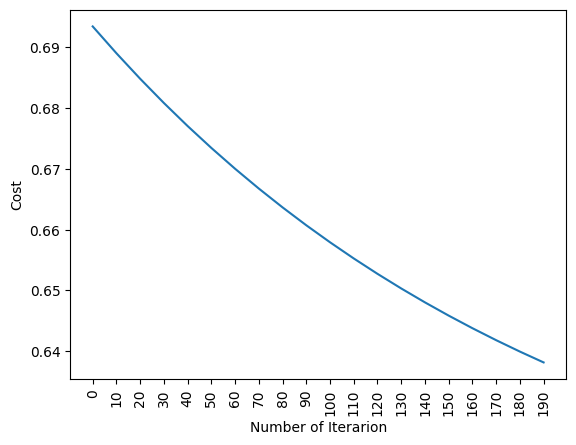

train accuracy: 71.0711441465357 %
test accuracy: 71.8608972657287 %


In [79]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]
    w,b = initialize_weights_and_bias(dimension)
    #update
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate =0.01, num_iterations = 200)

**ROC Curve with Logistic Regression**

In [80]:
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
y=y.astype(int)
y_train= y_train.astype(int)
y_test= y_test.astype(int)

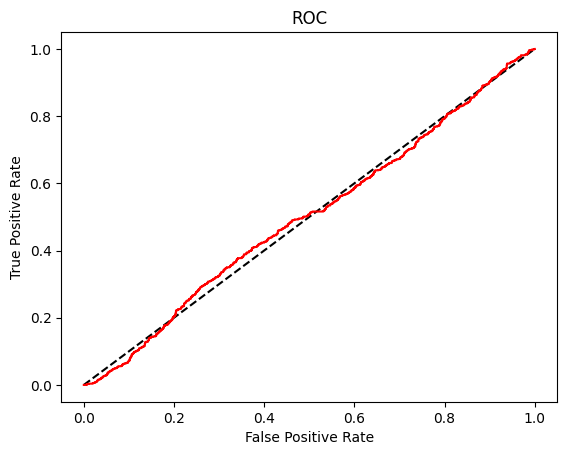

In [81]:
# ROC Curve with logistic regression
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_prob = logreg.predict_proba(x_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr,color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

In [82]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(logreg,x_train,y_train,cv=k)
cross_val_log=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.71068348 0.71068348 0.71068348 0.71068348 0.71068348 0.71068348
 0.71068348 0.71068348 0.71115538 0.71049137]
Cross_val scores average:  0.710711456320262


In [83]:
#GridSearchCV with Logreg
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-3, 3, 7), 'penalty': ['l1', 'l2']}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,param_grid,cv=3)
logreg_cv.fit(x_train,y_train)
print("Tuned hyperparameters : {}".format(logreg_cv.best_params_))
print("Best Accuracy: {}".format(logreg_cv.best_score_))
##numpy.logspace(start, stop, num=50, endpoint=True, base=10.0, dtype=None, axis=0)

Tuned hyperparameters : {'C': 0.001, 'penalty': 'l2'}
Best Accuracy: 0.710711438916891


In [84]:
Logistic_score=logreg_cv.best_score_
CrossVal_Logistic_score=cross_val_log

<a id="5"></a> <br>
**Ridge and Lasso Regression**

In [85]:
from sklearn.metrics import mean_squared_error
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [87]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.1)
ridge.fit(x_train,y_train)
ridge_predict = ridge.predict(x_test)
#print('Ridge score: ',ridge.score(x_test,y_test))
print("Test accuracy:",root_mean_squared_error(y_test,ridge_predict))

Test accuracy: 0.4362279864537237


In [88]:
Ridge_score= root_mean_squared_error(y_test,ridge_predict)

In [91]:
# Lasso
from sklearn.linear_model import Lasso
x = np.array(song_data.loc[:,['danceability','energy','audio_valence','tempo','song_duration_ms','acousticness','instrumentalness', 'liveness','loudness','speechiness']])
lasso = Lasso(alpha = 0.1)
lasso.fit(x_train,y_train)
lasso_predict = lasso.predict(x_test)
print('Lasso coefficients: ',lasso.coef_)
print("Test accuracy:",root_mean_squared_error(y_test,lasso_predict))

Lasso coefficients:  [ 7.28240116e-08 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  9.39174849e-03  0.00000000e+00
 -2.44883491e-04 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00]
Test accuracy: 0.44670700443313444


In [92]:
Lasso_Score=root_mean_squared_error(y_test,lasso_predict)

In [93]:
x= ['song_duration_ms', 'acousticness', 'danceability',
     'energy', 'instrumentalness', 'key', 'liveness',
     'loudness', 'audio_mode', 'speechiness', 'tempo', 
     'time_signature', 'audio_valence']
y= ['popularity']

In [94]:
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV, train_test_split
import sklearn.metrics as metrics

def test(models, data, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            r2_test.append(metrics.r2_score(y_test,
                                            models[i].fit(x_train, 
                                                         y_train).predict(x_test)))
            r2_train.append(metrics.r2_score(y_train, 
                                             models[i].fit(x_train, 
                                                          y_train).predict(x_train)))
        results[i] = [np.mean(r2_train), np.mean(r2_test)]
    return pd.DataFrame(results)

In [95]:
models = {'OLS': linear_model.LinearRegression(),
         'Lasso': linear_model.Lasso(),
         'Ridge': linear_model.Ridge(),}
test(models,song_data)

,OLS,Lasso,Ridge
0,0.067470,0.000090,0.067464
1,0.058923,-0.000383,0.058942


In [96]:
test(models,song_data)

,OLS,Lasso,Ridge
0,0.067470,0.000090,0.067464
1,0.058923,-0.000383,0.058942


<a id="6"></a> <br>
**KNN Algorithm**

In [98]:
# KNN prediction
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
x,y = song_data.loc[:,song_data.columns != 'popularity'], song_data.loc[:,'popularity']
y=y.astype(int)
knn.fit(x,y)
prediction = knn.predict(x.values)
print('Prediction: {}'.format(prediction))

Prediction: [1 0 0 ... 0 0 0]


In [101]:
#KNN Test
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train,y_train)
prediction = knn.predict(x_test.values)
print('With KNN (K=3) train accuracy is: ',knn.score(x_train.values,y_train.values))
print('With KNN (K=3) test accuracy is: ',knn.score(x_test.values,y_test.values))

With KNN (K=3) train accuracy is:  0.9954871250331829
With KNN (K=3) test accuracy is:  0.7905495088930183


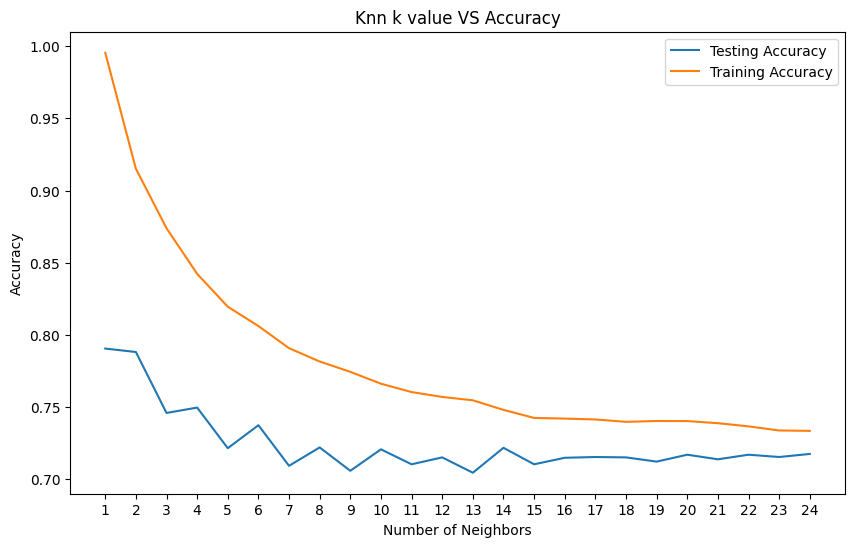

Best accuracy is 0.7905495088930183 with K = 1


In [103]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy.append(knn.score(x_train.values, y_train.values))
    test_accuracy.append(knn.score(x_test.values, y_test.values))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Knn k value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

In [105]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(knn,x_train.values,y_train.values,cv=k)  
cv_result_knn=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.72594559 0.71267419 0.71001991 0.7146649  0.70670206 0.7146649
 0.71930989 0.71333776 0.71181939 0.71779548]
Cross_val scores average:  0.7146934051011173


In [107]:
from sklearn.model_selection import GridSearchCV
grid = {'n_neighbors': np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=3) 
knn_cv.fit(x.values,y.values)
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best accuracy: {}".format(knn_cv.best_score_))

Tuned hyperparameter k: {'n_neighbors': 2}
Best accuracy: 0.7602344321667839


In [108]:
KKN_Score= max(test_accuracy)
CrossVal_KKN_Score=cv_result_knn

<a id="7"></a> <br>
**SVM**

- SVM is an effective and simple method mostly used in classification problems. The aim of the SVM algorithm is to find a hyperplane in an N-dimensional space (N — the number of features) that distinctly classifies the data points. C and Gamma are the parameters for a nonlinear support vector machine (SVM) with a Gaussian radial basis function kernel.

In [109]:
from sklearn.svm import SVC
svm= SVC(random_state=1)  #kernel='rbf'
svm.fit(x_train,y_train)
print("Train accuracy of svm algo:",svm.score(x_train,y_train))
print("Test accuracy of svm algo:",svm.score(x_test,y_test))

Train accuracy of svm algo: 0.710711441465357
Test accuracy of svm algo: 0.718608972657287


In [110]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(svm,x_train,y_train,cv=k) 
cv_result_svm= np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.71068348 0.71068348 0.71068348 0.71068348 0.71068348 0.71068348
 0.71068348 0.71068348 0.71115538 0.71049137]
Cross_val scores average:  0.710711456320262


In [111]:
SVM_score= svm.score(x_test,y_test)
CrossVal_SVM_score=cv_result_svm

In [112]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

steps = [('scalar', StandardScaler()),
         ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100],
              'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline,param_grid=parameters,cv=10)
cv.fit(x_train,y_train)
y_pred = cv.predict(x_test)

print("Tuned Model Parameters: {}".format(cv.best_params_))
print("Test accuracy: {}".format(cv.score(x_test, y_test)))
## Run on your system 

KeyboardInterrupt: 

<a id="8"></a> <br>
**Naive Bayes**

In [113]:
from sklearn.naive_bayes import GaussianNB
nb= GaussianNB()
nb.fit(x_train,y_train)
print("Train accuracy of naive bayes:",nb.score(x_train,y_train))
print("Test accuracy of naive bayes:",nb.score(x_test,y_test))


Train accuracy of naive bayes: 0.710711441465357
Test accuracy of naive bayes: 0.718608972657287


In [115]:
Naive_bayes_score=nb.score(x_test,y_test)
Naive_bayes_score

0.718608972657287

<a id="9"></a> <br>
**Decision Tree Classifier**

In [116]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,f1_score
from sklearn.tree import DecisionTreeClassifier

dt= DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
DecisionTree_score=dt.score(x_test,y_test)
print("Train ccuracy of decision tree:",dt.score(x_train,y_train))
print("Test accuracy of decision tree:",dt.score(x_test,y_test))

Train ccuracy of decision tree: 0.9960844173082029
Test accuracy of decision tree: 0.8157685160605256


In [117]:
from sklearn.model_selection import cross_val_score
k =10
cv_result = cross_val_score(dt,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.80026543 0.79296616 0.80424685 0.77969476 0.79827472 0.77239549
 0.78898474 0.80225614 0.79548473 0.80478088]
Cross_val scores average:  0.793934987764051


> <a id="10"></a> <br>
**Random Forest Classifier**
- RF is one of the most popular ensemble learning method in machine learning not only gives good results even without hyperparameter optimization but also can use both classification and regression problems. But the common problem of the traditional decision trees is over-fitting. In order to avoid overfitting, random forest models select and train hundreds of different sub-samples (multiple deep decision trees) randomly and reduce the variance. We used 100 estimators and random state 3 gave the about % 89 accuracy. 

In [118]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=150,random_state = 3)
rf.fit(x_train,y_train)
print("Train ccuracy of random forest",rf.score(x_train,y_train))
print("Test accuracy of random forest",rf.score(x_test,y_test))
RandomForestClassifier_score=rf.score(x_test,y_test)
y_pred=rf.predict(x_test)
t_true=y_test

Train ccuracy of random forest 0.9960844173082029
Test accuracy of random forest 0.8975311919299177


In [119]:
from sklearn.model_selection import cross_val_score
k = 10
cv_result = cross_val_score(rf,x_train,y_train,cv=k) # uses R^2 as score 
cv_result_randomforest=np.sum(cv_result)/k
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.88188454 0.87657598 0.8871931  0.86994028 0.88453882 0.8606503
 0.87524884 0.88586596 0.88047809 0.87981408]
Cross_val scores average:  0.8782189974893614


In [120]:
CrossVal_RandomForestClassifier_score=cv_result_randomforest

**Confusion Matrix with Random Forest**

In [121]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 4)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y_test,y_pred))

Confusion matrix: 
 [[2657   50]
 [ 339  721]]
Classification report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      2707
           1       0.94      0.68      0.79      1060

    accuracy                           0.90      3767
   macro avg       0.91      0.83      0.86      3767
weighted avg       0.90      0.90      0.89      3767



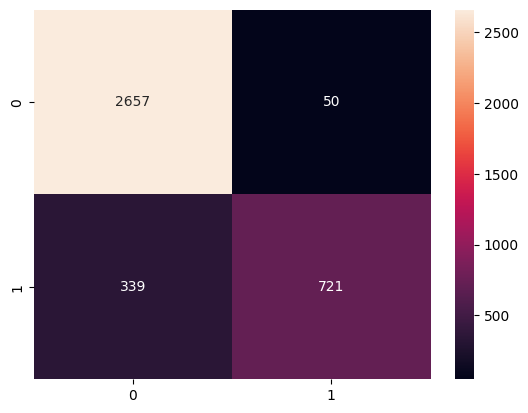

In [122]:
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

- Since we set our threshold such that 70% of the songs in our dataset are named as not popular and 30% are named as popular, 70% accuracy can be achieved by predicting all 0s. In order to capture this, we should consider the precision and recall values. As we see in confusion matrix, model predicted “695 popular” songs and “2596 unpopular” songs correct.


In [123]:
#Voting Classifier
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('Random Forest', rf), ('Logistic Regression', logreg)], 
                       voting='soft', weights=[2,1]).fit(x_train,y_train)
print('The train accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_train,y_train))
print('The test accuracy for Random Forest and Logistic Regression is:',ensemble.score(x_test,y_test))

The train accuracy for Random Forest and Logistic Regression is: 0.9945580037164853
The test accuracy for Random Forest and Logistic Regression is: 0.8962038757632068


In [124]:
from sklearn.model_selection import cross_val_score
k = 5
cv_result = cross_val_score(ensemble,x_train,y_train,cv=k) # uses R^2 as score 
print('Cross_val Scores: ',cv_result)
print('Cross_val scores average: ',np.sum(cv_result)/k)

Cross_val Scores:  [0.87193099 0.87259456 0.86595886 0.87553933 0.87952207]
Cross_val scores average:  0.873109161340451


<a id="11"></a> <br>
## FEATURE IMPORTANCE

In [125]:
# plot feature importance manually
from numpy import loadtxt
from xgboost import XGBClassifier
from matplotlib import pyplot

# fit model no training data
model = XGBClassifier()
model.fit(x_train, y_train)
# feature importance
print(model.feature_importances_)
# plot
#pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
#pyplot.show()

[0.03581235 0.04285324 0.03834992 0.03989428 0.07653019 0.034559
 0.04447152 0.03848994 0.03624181 0.04436877 0.         0.03312073
 0.07724993 0.04004824 0.03981711 0.03191001 0.02669067 0.03724042
 0.03163741 0.03136814 0.02530541 0.03805806 0.03648148 0.02167278
 0.02076945 0.         0.         0.02151418 0.03851327 0.01703159]


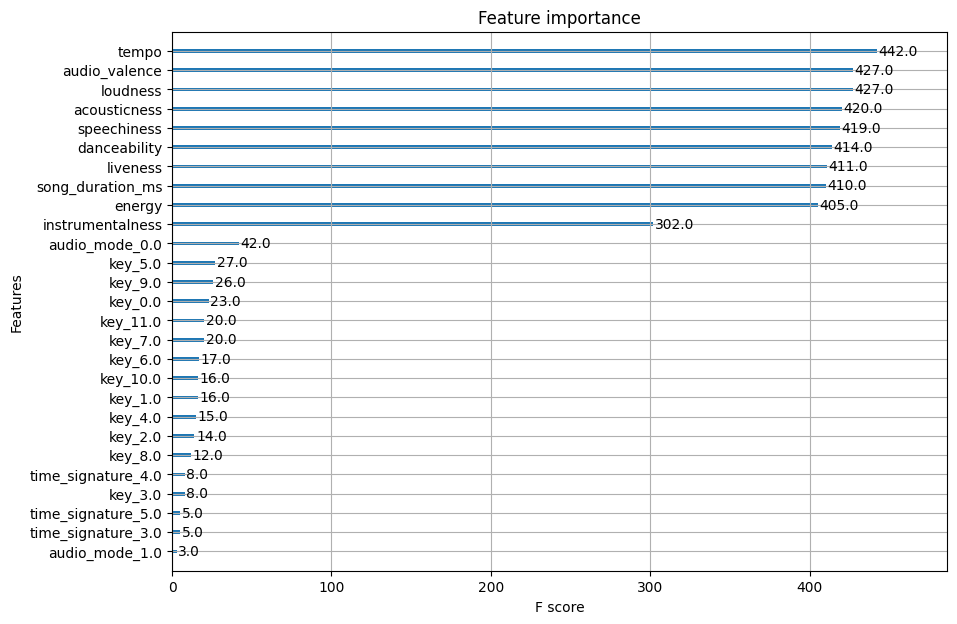

In [126]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(x_train, y_train)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(10, 7)
#plot_importance(model)
pyplot.show()

In [127]:
from numpy import sort
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

thresholds = sort(model.feature_importances_) # Fit model using each importance as a threshold

for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True) # if prefit=True, you should call transform directly.
    select_X_train = selection.transform(x_train)
    # train model 
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    # evaluate model
    select_X_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_X_test)
    predictions = [round(value) for value in y_pred]
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 84.10%
Thresh=0.000, n=30, Accuracy: 84.10%
Thresh=0.000, n=30, Accuracy: 84.10%
Thresh=0.000, n=30, Accuracy: 84.10%
Thresh=0.017, n=27, Accuracy: 84.10%
Thresh=0.021, n=26, Accuracy: 83.99%
Thresh=0.022, n=25, Accuracy: 84.20%
Thresh=0.022, n=24, Accuracy: 84.07%
Thresh=0.025, n=23, Accuracy: 83.67%
Thresh=0.027, n=22, Accuracy: 83.86%
Thresh=0.031, n=21, Accuracy: 83.97%
Thresh=0.032, n=20, Accuracy: 84.23%
Thresh=0.032, n=19, Accuracy: 83.75%
Thresh=0.033, n=18, Accuracy: 83.75%
Thresh=0.035, n=17, Accuracy: 84.26%
Thresh=0.036, n=16, Accuracy: 83.01%
Thresh=0.036, n=15, Accuracy: 83.25%
Thresh=0.036, n=14, Accuracy: 83.38%
Thresh=0.037, n=13, Accuracy: 82.98%
Thresh=0.038, n=12, Accuracy: 82.74%
Thresh=0.038, n=11, Accuracy: 82.16%
Thresh=0.038, n=10, Accuracy: 81.74%
Thresh=0.039, n=9, Accuracy: 80.83%
Thresh=0.040, n=8, Accuracy: 80.54%
Thresh=0.040, n=7, Accuracy: 80.51%
Thresh=0.040, n=6, Accuracy: 79.45%
Thresh=0.043, n=5, Accuracy: 79.16%
Thresh=0.044, n=4, Accurac

<a id="12"></a> <br>
## Comparison Of Performance

In [128]:
model_performances=pd.DataFrame({'Model':['RandomForestClassifier','SVM','DesicionTreeClassifier','K-NearestNeighbors','LogisticRegession','NaiveBayes','Ridge','Lasso'],
                                 'Accuracy':[RandomForestClassifier_score,SVM_score,DecisionTree_score,KKN_Score,Logistic_score,Naive_bayes_score,Ridge_score,Lasso_Score]})
model_performances.sort_values(by = "Accuracy",ascending=False)

,Model,Accuracy
0,RandomForestClassifier,0.897531
2,DesicionTreeClassifier,0.815769
3,K-NearestNeighbors,0.790550
1,SVM,0.718609
5,NaiveBayes,0.718609
4,LogisticRegession,0.710711
7,Lasso,0.446707
6,Ridge,0.436228


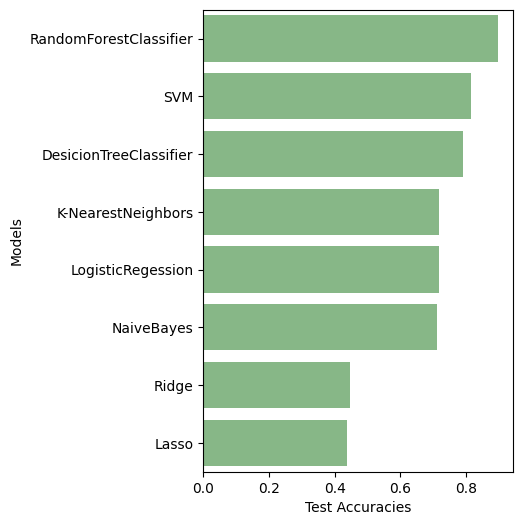

In [129]:
model_list= list(model_performances['Model'].unique())
accuracy_list= list(model_performances['Accuracy'].sort_values(ascending=False))
f,ax = plt.subplots(figsize = (4,6))
sns.barplot(x=accuracy_list,y=model_list,color='green',alpha = 0.5)
ax.set(xlabel='Test Accuracies', ylabel='Models')
plt.show()


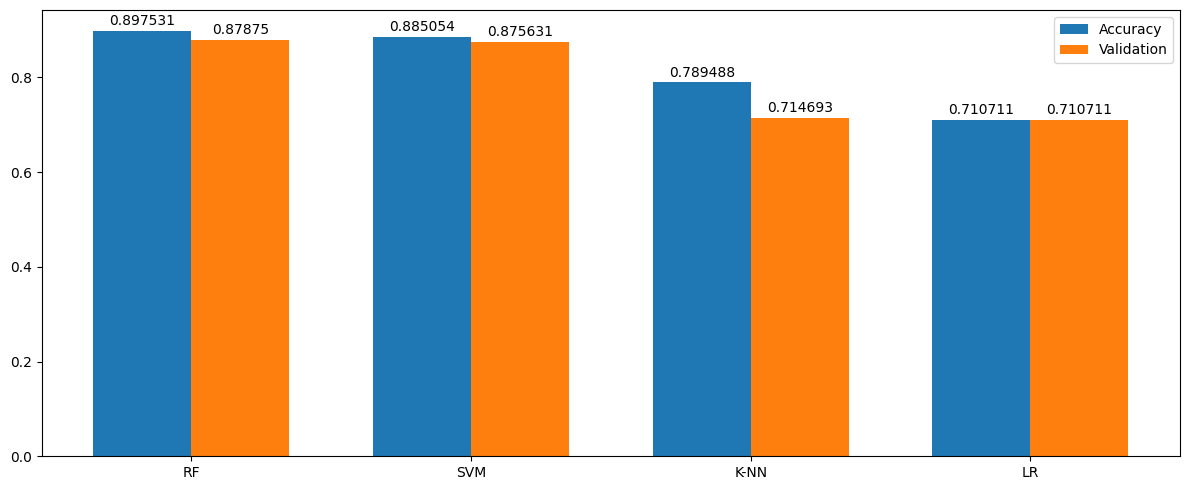

In [130]:
labels = ['RF','SVM', 'K-NN', 'LR']
accuracy = [0.897531,0.885054, 0.789488,0.710711]
validation = [0.878750, 0.875631, 0.714693, 0.710711]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 5))
rects1 = ax.bar(x - width/2,accuracy, width, label='Accuracy')
rects2 = ax.bar(x + width/2, validation, width, label='Validation')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

<a id="13"></a> <br>
## Conclusion

First we tried to predict popular songs using audio features then we added song name texts’ polarity to it and tried to improve our model. We also fitted the model using each importance as a threshold. Although accusticness is the most important of these features did not lead us to a strong result.  
We had 18835 songs available. Decision Tree algorithms which mainly given better results when we don’t have so much data got the best result with RF. There were no strong linear correlations in our data, so linear methods did not fit well. In LR, We built the model using the gradient decent and this gave the best result in 200 iterations which was a moderate result. As in many popularity studies, we achieved the second best result with SVM. Adding Polarity to features value has almost not changed the result at all .
For the future work, the following questions can be asked. Nowadays, the industrialization of popular music has became more common all over the world and most musicians are using computers when they create their songs. So are songs started to be more similar and less unique? Does these affect our predictions in a positive way? With industrialization, prediction of the popular and trendy items are getting easier? Could the prediction increase if we had data with all the songs are created by a computer?